In [2]:
#import 
import numpy as np
import matplotlib.pyplot as plt

data_set = np.load("dataset1.npz")

def explore_data(data_set):
    X = data_set['X']
    y = data_set['y']
    print('size:',[X.size,y.size])
    print('dimensionen:',[X.ndim,y.ndim])
    print('shape:',[X.shape,y.shape])
    print('type:',[X.dtype,y.dtype])
    print()
    for i in range(0, 10):
        Xfi = X[0:, i]
        print("Maximum of Feature "+ str(i+1) + ": " + str(np.amax(Xfi)))
        print("Minimum of Feature "+ str(i+1) + ": " + str(np.amin(Xfi)))
        print("Average of Feature  "+ str(i+1) + ": " + str(np.average(Xfi)))
        print("Deviation of Feature  "+ str(i+1) + ": " + str(np.std(Xfi)))
        print()
    unique, counts = np.unique(y, return_counts=True)
    print("Set of labels: " +str(unique))
    print("Number of elements with label 0: " + str(counts[0]))
    print("Number of elements with label 1: " + str(counts[1]))
    
explore_data(data_set)
X = data_set['X']
y = data_set['y']

size: [10000, 1000]
dimensionen: [2, 1]
shape: [(1000, 10), (1000,)]
type: [dtype('float64'), dtype('float64')]

Maximum of Feature 1: 7.151837809584448
Minimum of Feature 1: -7.973059964042594
Average of Feature  1: 0.03440674449812322
Deviation of Feature  1: 2.6484323708152333

Maximum of Feature 2: 9.998219823430187
Minimum of Feature 2: -9.991938511056016
Average of Feature  2: 0.146937159113831
Deviation of Feature  2: 5.72760644493366

Maximum of Feature 3: 8.763663899537553
Minimum of Feature 3: -8.34514569295385
Average of Feature  3: -0.08676846488374124
Deviation of Feature  3: 3.4858798529199118

Maximum of Feature 4: 9.993909445678884
Minimum of Feature 4: -9.988983768575238
Average of Feature  4: -0.25018324126584096
Deviation of Feature  4: 5.732161109655073

Maximum of Feature 5: 7.674769492325406
Minimum of Feature 5: -8.690367430502043
Average of Feature  5: -0.06043432050359542
Deviation of Feature  5: 2.53069958382897

Maximum of Feature 6: 9.995641730689602
Minimum

knn, logistic regression, concept learning(ML, MAP, posterior predictive distribution), optimum bayes, naive bayes, decision tree, random forest

KNeighborsClassifier():
0.624

LogisticRegression(random_state=0):
0.412

GaussianNB():
0.908

DecisionTreeClassifier(random_state=0):
0.876

RandomForestClassifier():
0.904


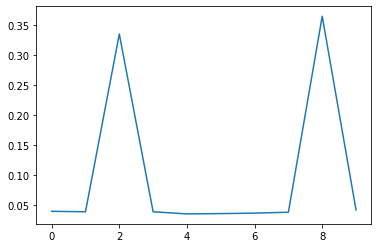


KNeighborsClassifier():
0.468

LogisticRegression(random_state=0):
0.456

GaussianNB():
0.484

DecisionTreeClassifier(random_state=0):
0.468

RandomForestClassifier():
0.476



In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

neigh = KNeighborsClassifier()
logReg = LogisticRegression(random_state=0)
gnb = GaussianNB()
decTreeC = DecisionTreeClassifier(random_state=0)
raFoC = RandomForestClassifier()
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)

methods = [neigh, logReg, gnb, decTreeC, raFoC, clf]

for method in methods:
    method.fit(X_train, y_train)
    print(str(method) + ":")
    print(method.score(X_test, y_test))
    if(method == raFoC):
        importances = raFoC.feature_importances_
        plt.plot(importances)
        plt.show()
    print()


Xf1 = X_train[0:, 2]
Xt1 = X_test[0:, 2]
Xf2 = X_train[0:, 8]
Xt2 = X_test[0:, 8]

Xfs = [Xf1, Xf2]
Xts = [Xt1, Xt2]

Xtrain1 = np.stack(Xfs)
Xtest1 = np.stack(Xts)

Xtrain2 = np.reshape(Xtrain1, (750,2))
Xtest2 = np.reshape(Xtest1, (250, 2))

for method in methods:
    method.fit(Xtrain2, y_train)
    print(str(method) + ":")
    print(method.score(Xtest2, y_test))
    print()

Clustering: DBSCAN, Agglomerative hierachical clustering, K-means

size: 800
dimensionen: 2
shape: (400, 2)
type: float64

Maximum of Feature 1: 9.913844461660922
Minimum of Feature 1: -8.970549522825728
Average of Feature  1: 0.10299282591423634
Deviation of Feature  1: 5.151617344678073
Maximum of Feature 2: 8.908411023267181
Minimum of Feature 2: -7.242298886067668
Average of Feature  2: 0.7041588584208401
Deviation of Feature  2: 5.190838719909774


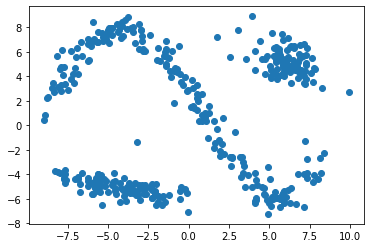

In [8]:
real_data = np.load("dataset2.npz")

def explore_data2(data_set):
    X = data_set['X']
    print('size:',X.size)
    print('dimensionen:',X.ndim)
    print('shape:',X.shape)
    print('type:',X.dtype)
    print()
    for i in range(0, 2):
        Xfi = X[0:, i]
        print("Maximum of Feature "+ str(i+1) + ": " + str(np.amax(Xfi)))
        print("Minimum of Feature "+ str(i+1) + ": " + str(np.amin(Xfi)))
        print("Average of Feature  "+ str(i+1) + ": " + str(np.average(Xfi)))
        print("Deviation of Feature  "+ str(i+1) + ": " + str(np.std(Xfi)))


explore_data2(real_data)

X = real_data['X']
x0 = [x[0] for x in X]
x1 = [x[1] for x in X]
plt.scatter(x0, x1)
plt.show()

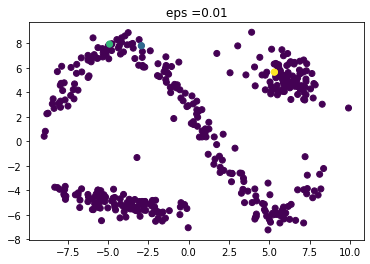

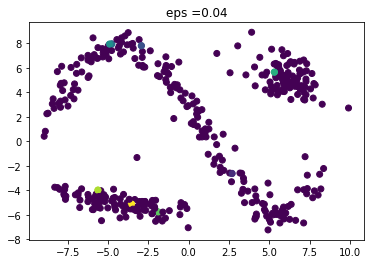

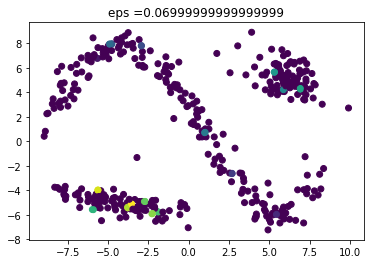

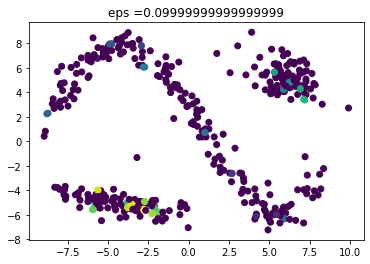

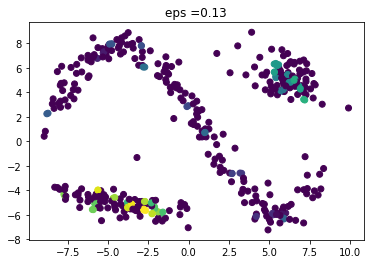

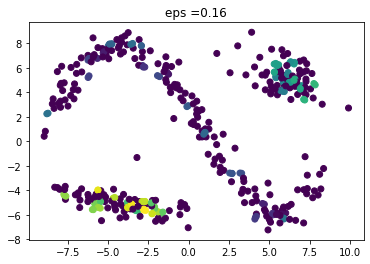

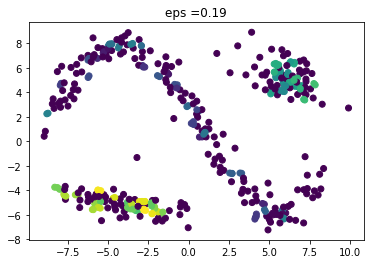

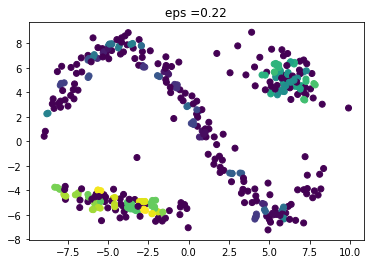

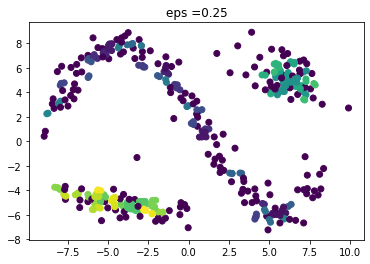

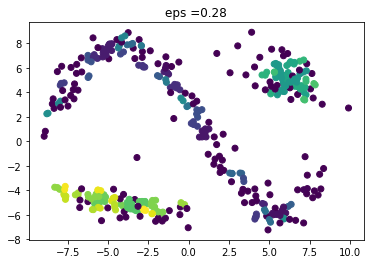

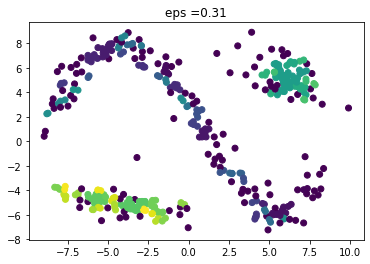

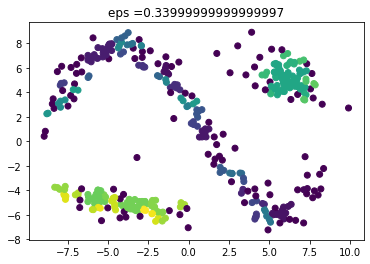

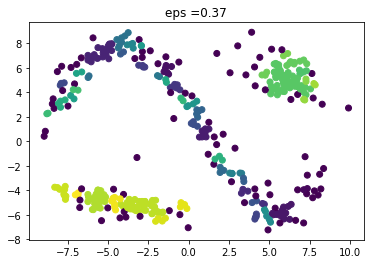

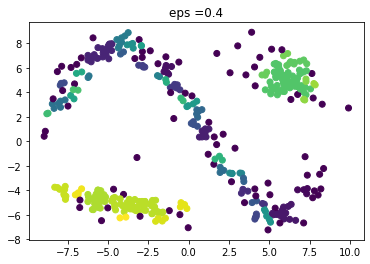

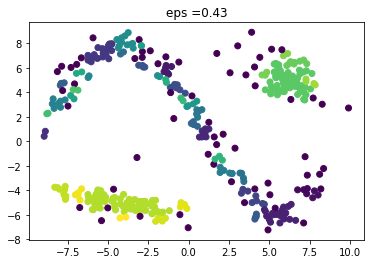

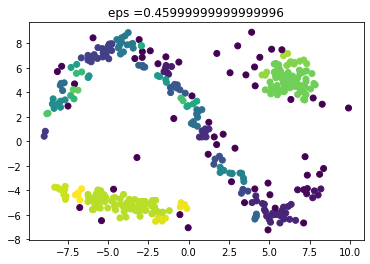

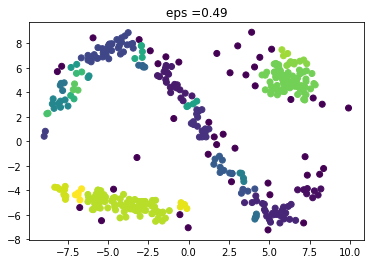

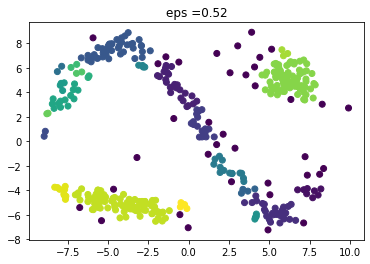

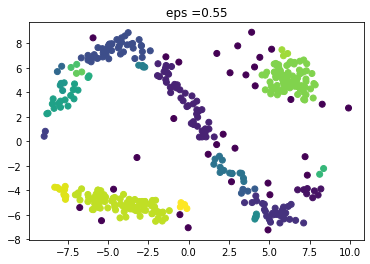

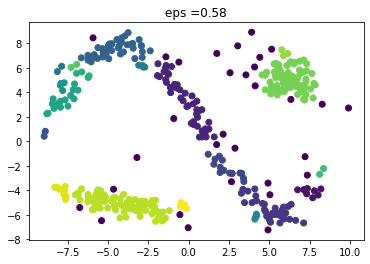

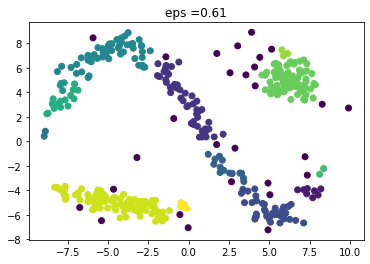

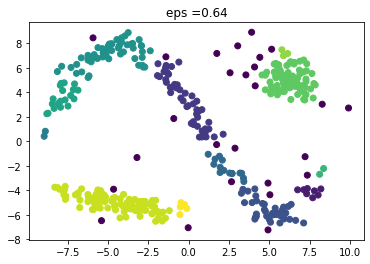

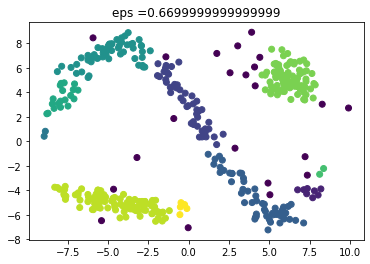

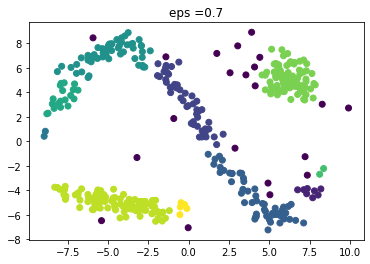

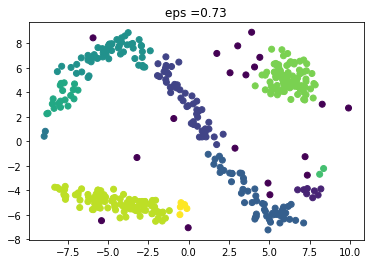

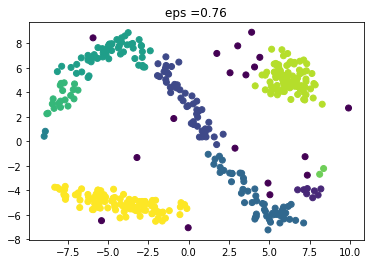

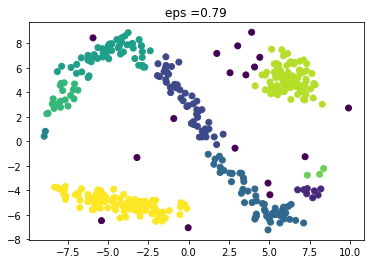

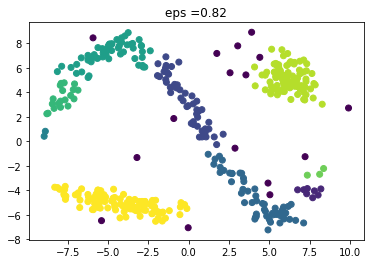

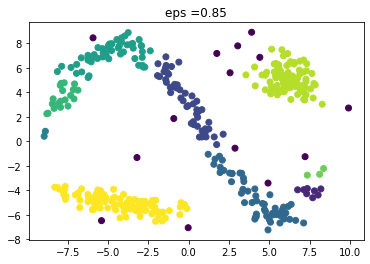

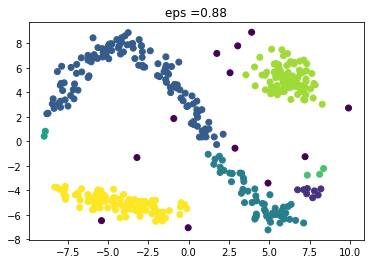

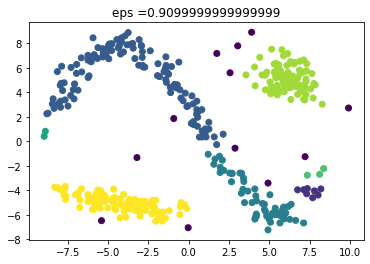

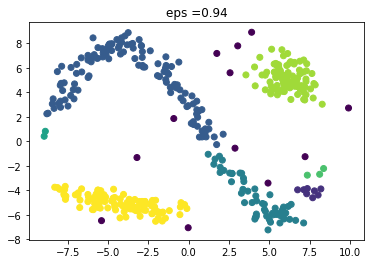

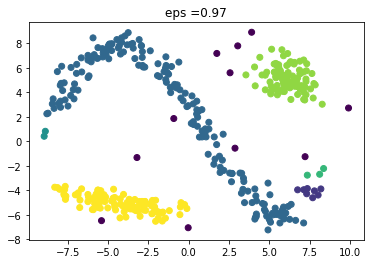

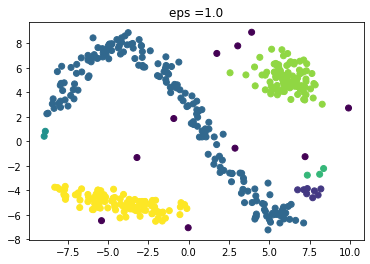

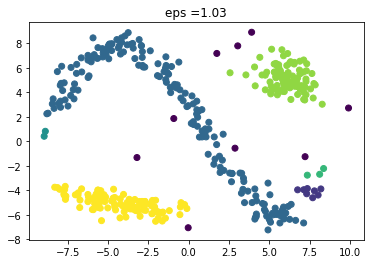

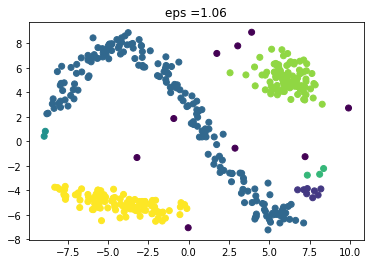

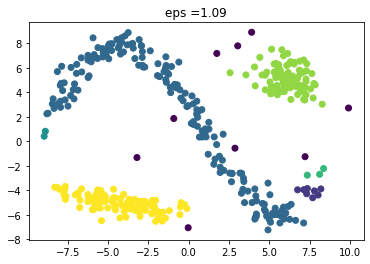

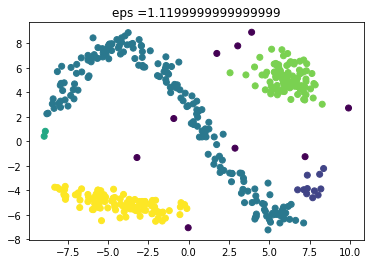

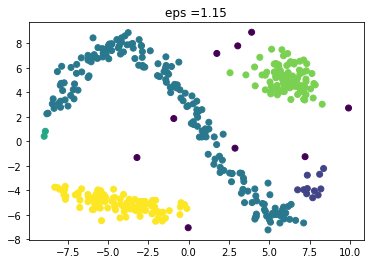

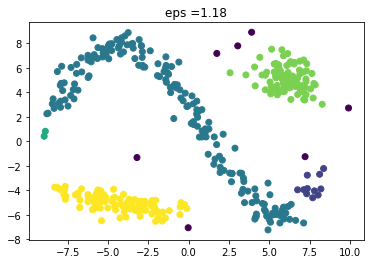

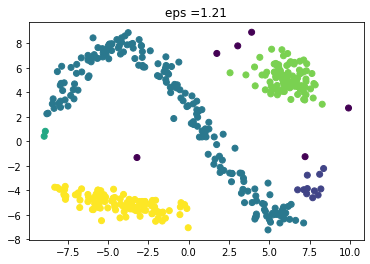

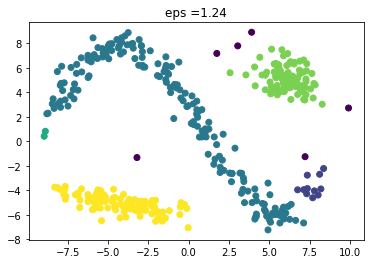

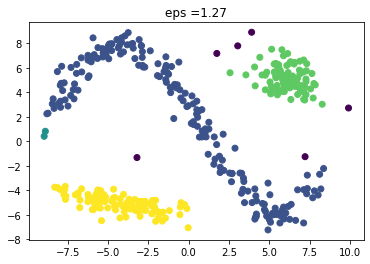

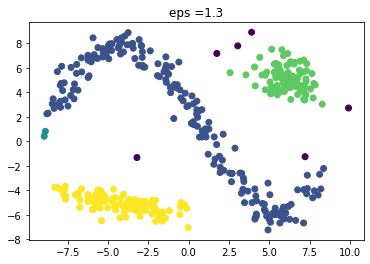

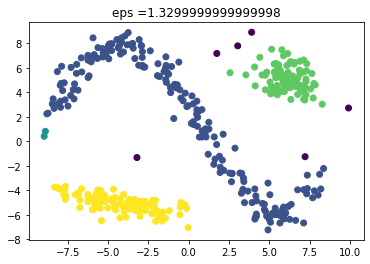

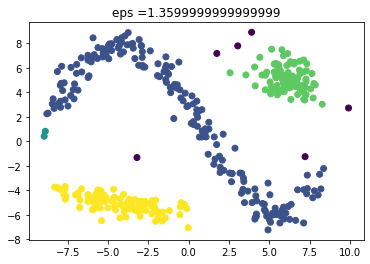

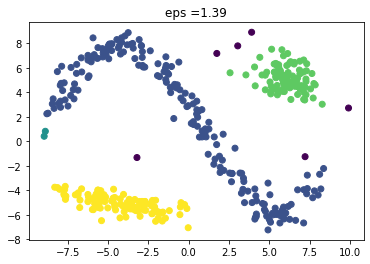

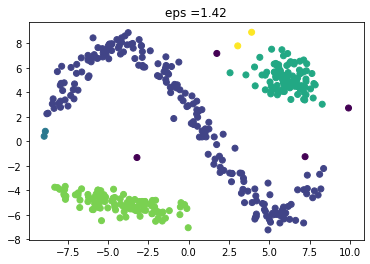

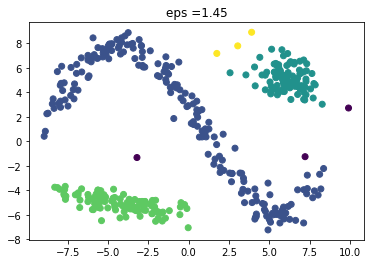

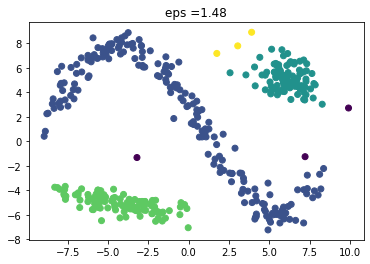

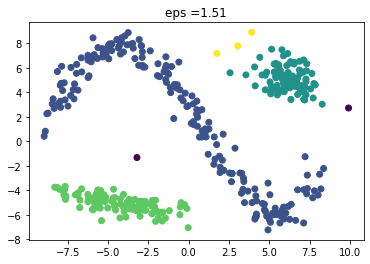

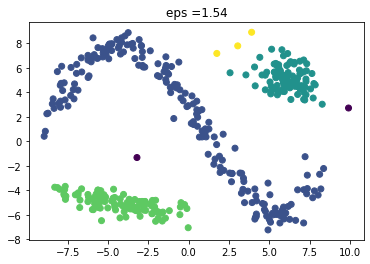

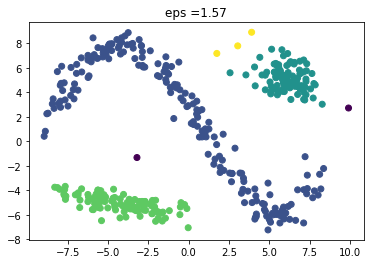

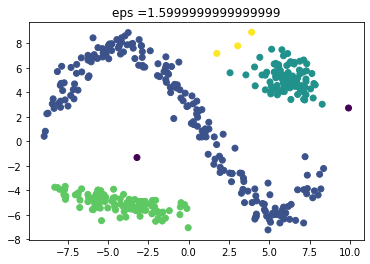

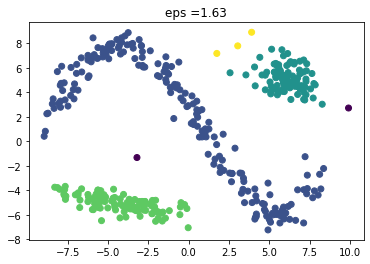

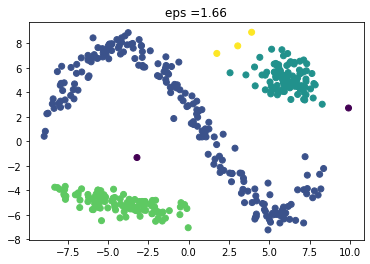

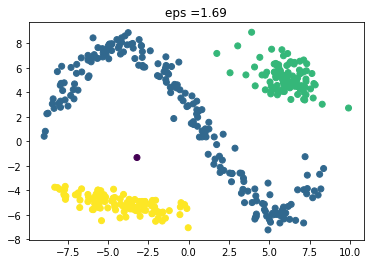

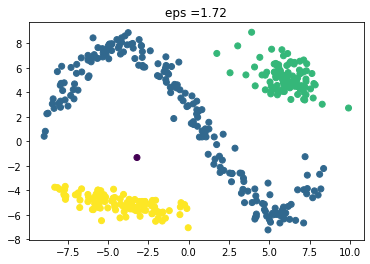

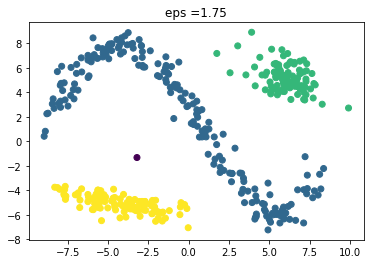

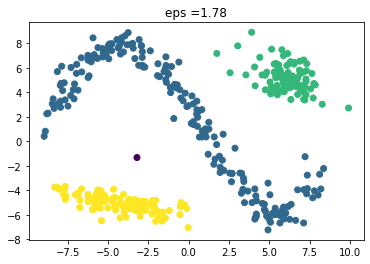

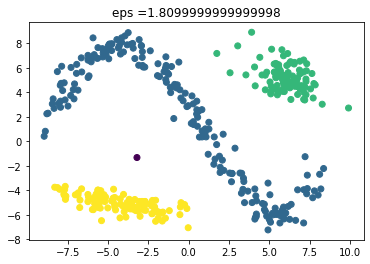

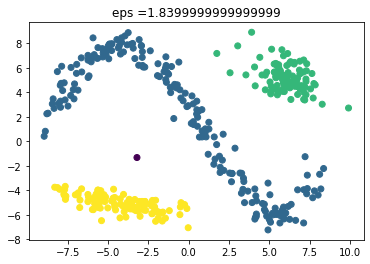

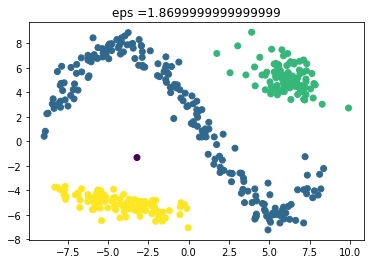

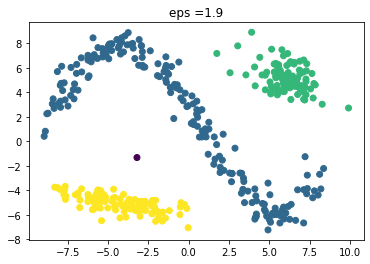

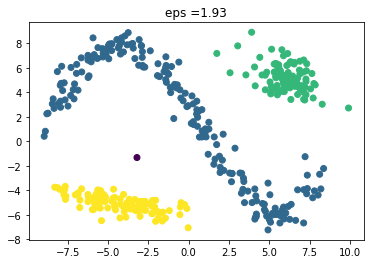

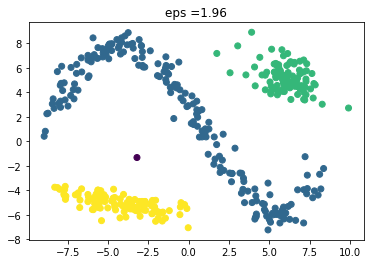

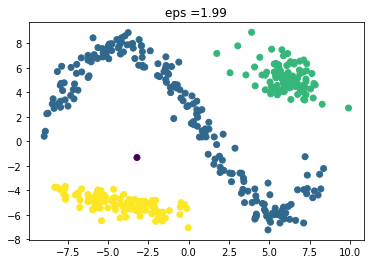

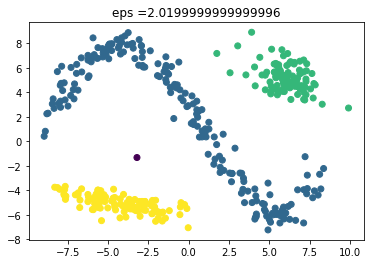

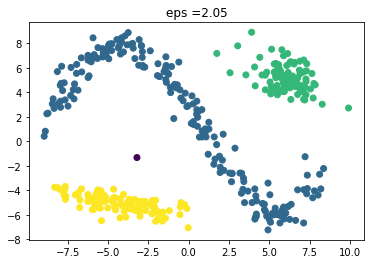

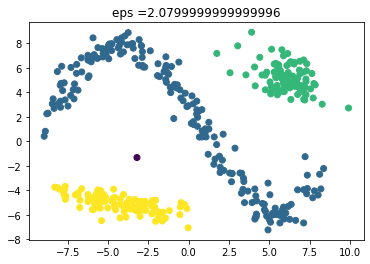

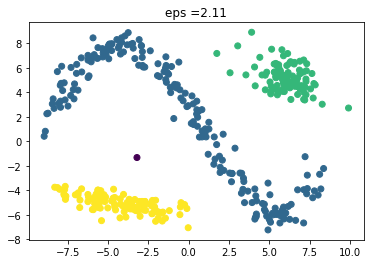

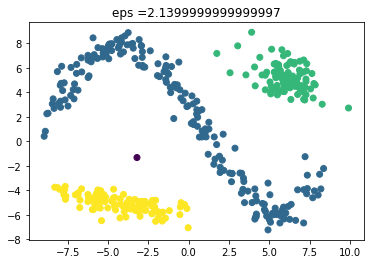

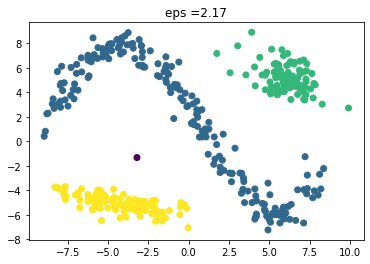

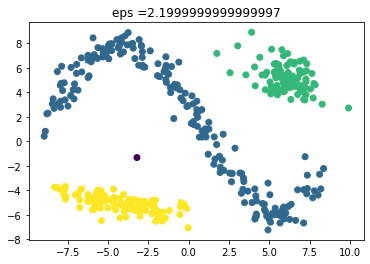

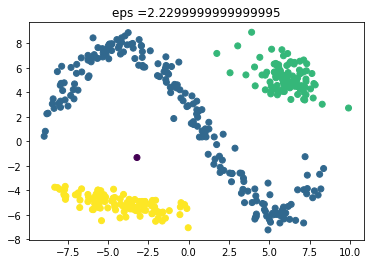

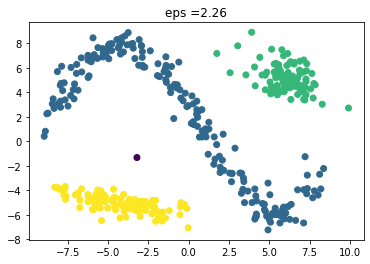

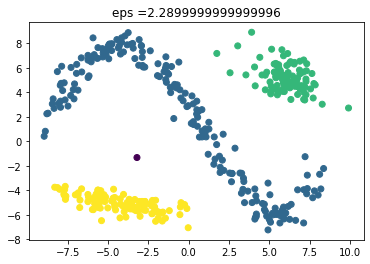

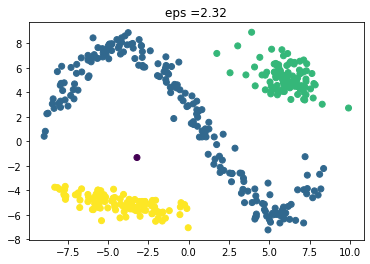

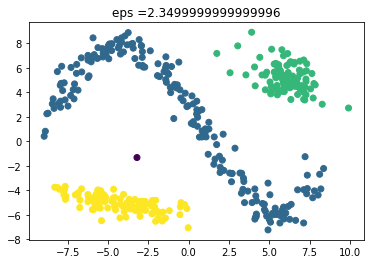

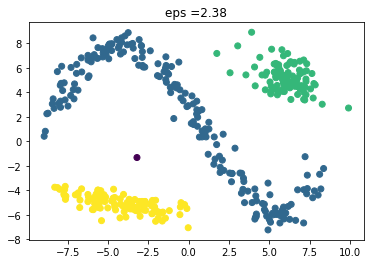

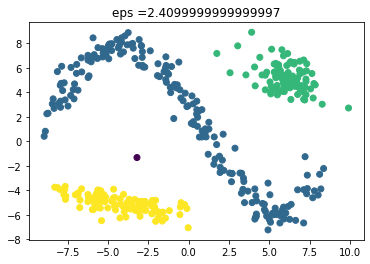

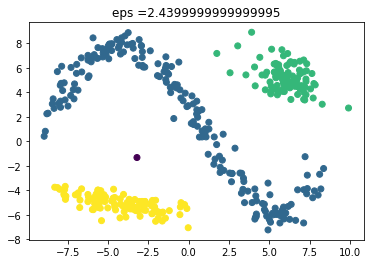

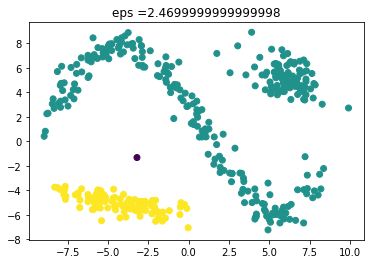

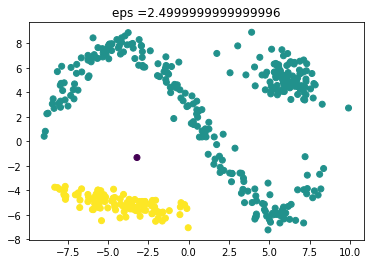

In [54]:
from sklearn.cluster import DBSCAN

for i in np.arange(0.01, 2.5, 0.03):
    clustering = DBSCAN(eps=i, min_samples=2).fit(X)
    plt.title("eps =" +str(i))
    plt.scatter(x0,x1,c=clustering.labels_)
    plt.show()

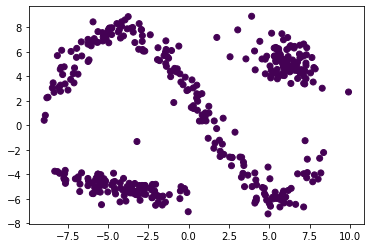

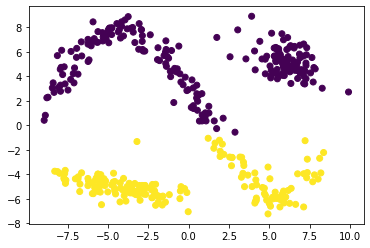

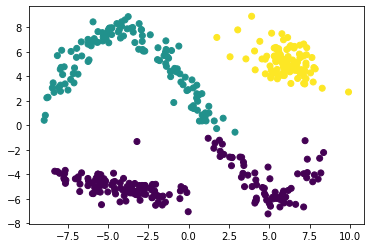

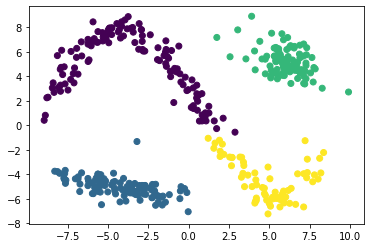

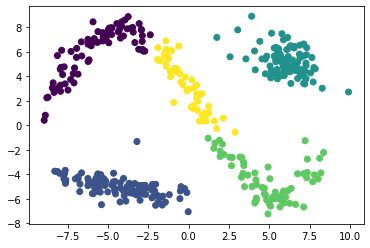

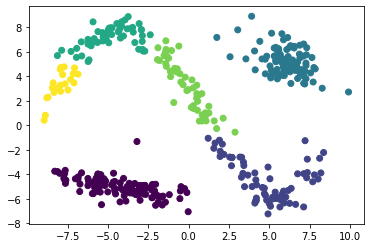

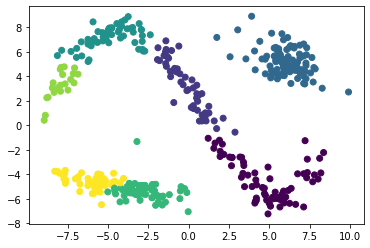

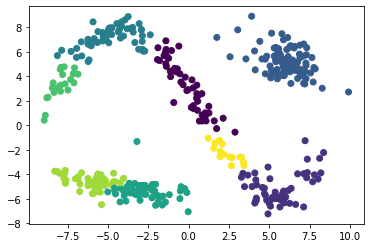

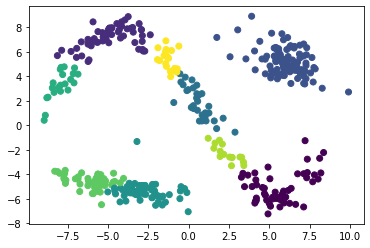

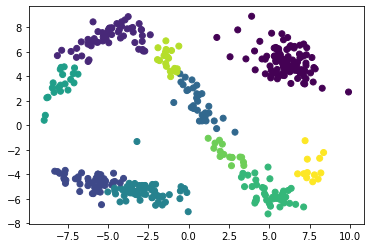

In [44]:
from sklearn.cluster import AgglomerativeClustering
for i in range (1, 11):
    clustering = AgglomerativeClustering(n_clusters=i).fit(X)
    plt.scatter(x0,x1,c=clustering.labels_)
    plt.title("clusters: " + str(i))
    plt.show()

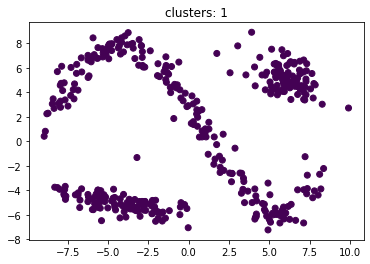

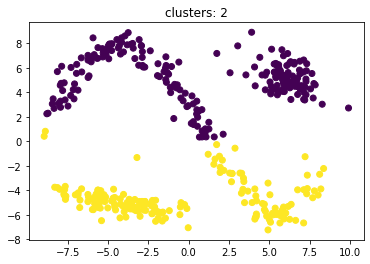

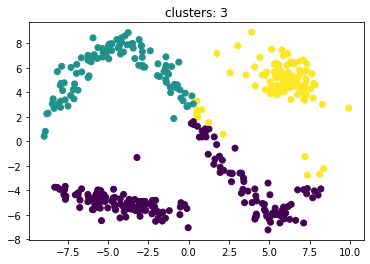

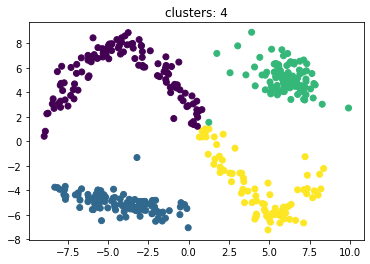

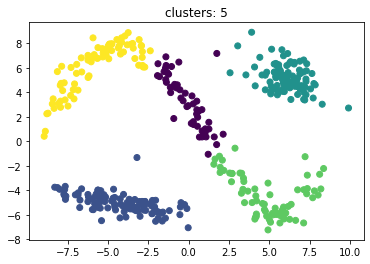

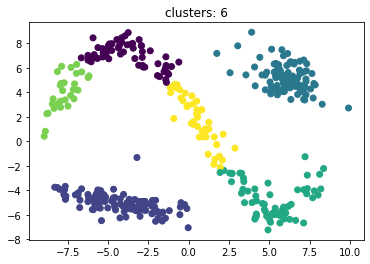

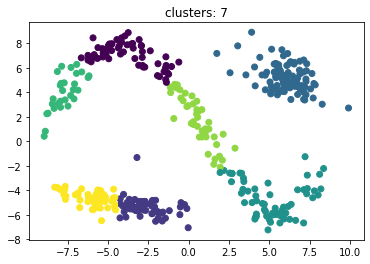

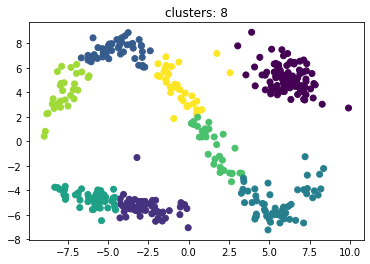

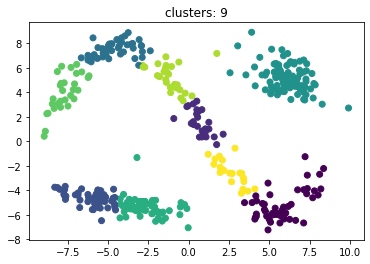

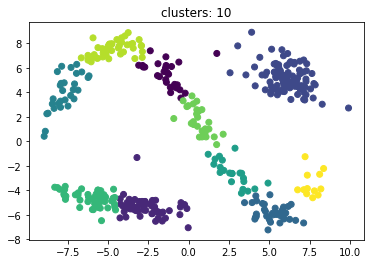

In [55]:
from sklearn.cluster import KMeans
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    plt.scatter(x0,x1,c=kmeans.labels_)
    plt.title("clusters: " + str(i))
    plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
sklearn.metrics.silhouette_score